<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import os
import random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.utils import load_img, img_to_array
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_path="/content/drive/MyDrive/Final_Project/Images/Dataset/Test/"
train_path="/content/drive/MyDrive/Final_Project/Images/Dataset/Train/"
val_path="/content/drive/MyDrive/Final_Project/Images/Dataset/Validation/"

In [ ]:
class_names = ['Mask', 'Without mask']

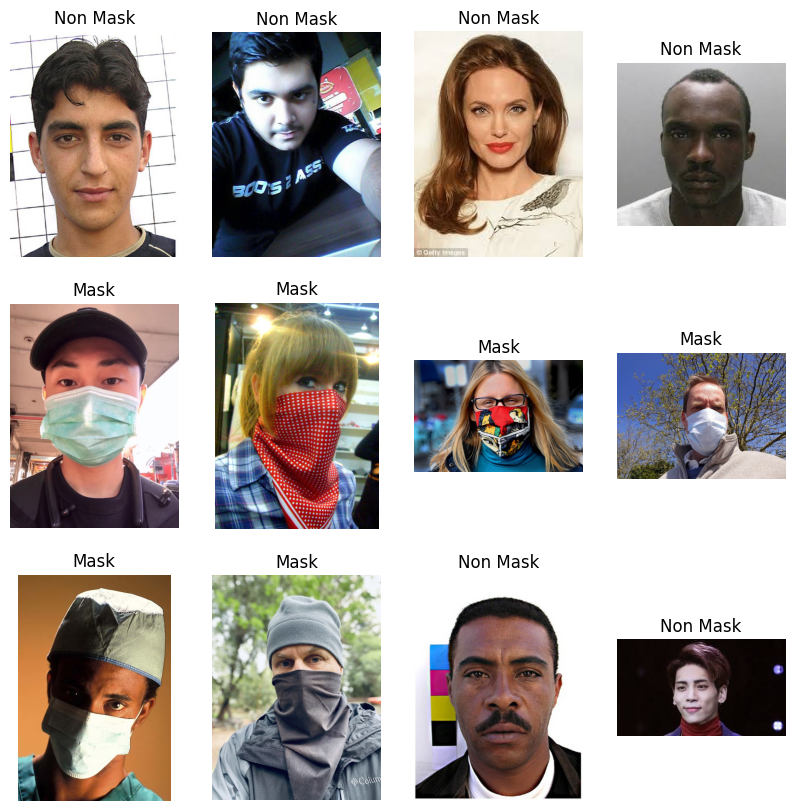

In [ ]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    return img

plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    r=random.randint(0,1)
    img = view_random_image(train_path, class_names[r])    

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=10, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=10, class_mode='categorical')
val_set = train_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=10, shuffle=True, class_mode='categorical')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs=5, validation_data=val_set)

Epoch 1/5
60/60 [==============================] - 118s 2s/step - loss: 0.4990 - accuracy: 0.7450 - val_loss: 0.5109 - val_accuracy: 0.7974
Epoch 2/5
60/60 [==============================] - 23s 391ms/step - loss: 0.3660 - accuracy: 0.8583 - val_loss: 0.4808 - val_accuracy: 0.7712
Epoch 3/5
60/60 [==============================] - 24s 397ms/step - loss: 0.2704 - accuracy: 0.9050 - val_loss: 0.3467 - val_accuracy: 0.8660
Epoch 4/5
60/60 [==============================] - 23s 381ms/step - loss: 0.2830 - accuracy: 0.8983 - val_loss: 0.3175 - val_accuracy: 0.8824
Epoch 5/5
60/60 [==============================] - 23s 378ms/step - loss: 0.2887 - accuracy: 0.8967 - val_loss: 0.3049 - val_accuracy: 0.8987


In [ ]:
eval = model.evaluate(test_set)
print("Test loss: ", eval[0])
print("Test accuracy: ", eval[1])

10/10 [==============================] - 24s 3s/step - loss: 0.2671 - accuracy: 0.9400
Test loss:  0.2671320140361786
Test accuracy:  0.9399999976158142


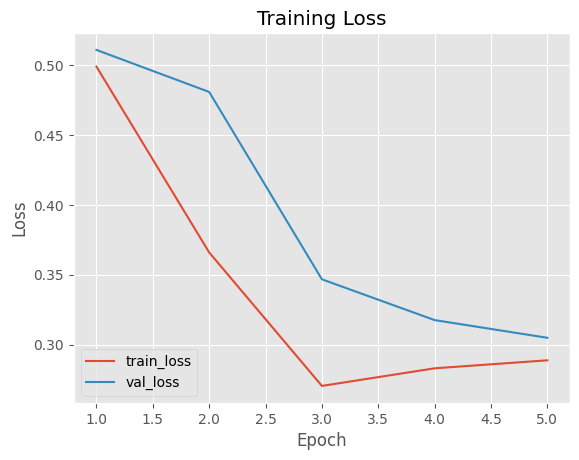

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, 6), history.history["loss"], label="train_loss")
plt.plot(np.arange(1, 6), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

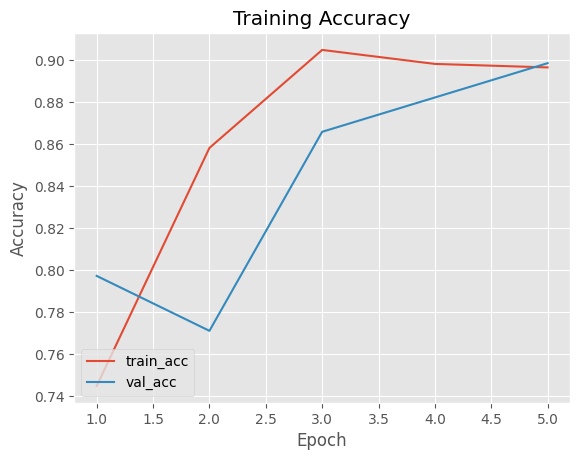

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, 6), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, 6), history.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

1/1 [==============================] - 0s 23ms/step
Mask


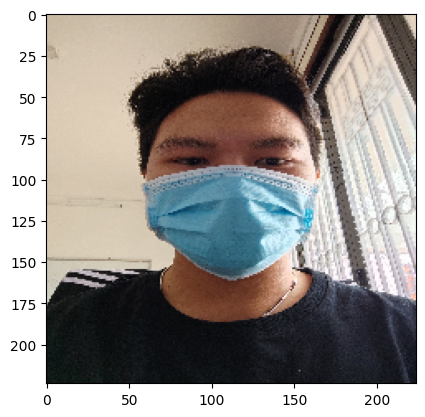

In [ ]:
img_resize = load_img("/content/drive/MyDrive/Final_Project/Images/Test2.jpg", target_size=(224,224))
plt.imshow(img_resize)
img_array = img_to_array(img_resize)
img_array = img_array.reshape(1,224,224,3)
img_array = img_array.astype('float32')/255.0
prediction = model.predict(img_array)
label = np.argmax(prediction, axis=1)[0]
print(class_names[label])

1/1 [==============================] - 0s 24ms/step
Without mask


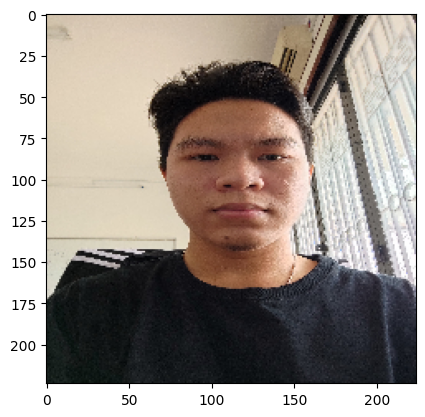

In [ ]:
img_resize = load_img("/content/drive/MyDrive/Final_Project/Images/Test1.jpg", target_size=(224,224))
plt.imshow(img_resize)
img_array = img_to_array(img_resize)
img_array = img_array.reshape(1,224,224,3)
img_array = img_array.astype('float32')/255.0
prediction = model.predict(img_array)
label = np.argmax(prediction, axis=1)[0]
print(class_names[label])

In [ ]:
model.save("/content/drive/MyDrive/Final_Project/Weights/face_mask_detection2.h5")